This notebook classifies diabetes using a decision tree.  We will see the number of leaves and size of training data affect the performance of the model.

Below we import our libraries.

In [0]:
import random
from sklearn import tree
import matplotlib.pyplot as plt
import math

Next, we download the data from GitHub. 

In [29]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2020-05-26 12:54:51--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  23.31K  --.-KB/s    in 0.004s  

2020-05-26 12:54:51 (5.93 MB/s) - ‘diabetes.csv.2’ saved [23873/23873]



Following downloading, we read the data and begin to process the data.

In [0]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")
feats = feats[0:(len(feats)-1)]	
alldat = []				
alllabs = []			
for i in range(1,len(data)):	
     line = data[i]		
     line = line.replace('\n','')		
     csvline = line.split(",")		
     alllabs = alllabs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     alldat = alldat + [csvline]

We next create a `trainmask` to separate training from testing data.  Using this `trainmask` we create the training and test datasets. 

In [0]:
trainmask = [random.randint(0,2) for i in range(len(alldat))]

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]]
testdat = [alldat[i] for i in range(len(alldat)) if not trainmask[i]]
testlabs = [alllabs[i] for i in range(len(alldat)) if not trainmask[i]]

Below we print the number of examples in the training data.

In [32]:
len(traindat)

517

Next we will train 28 decision trees with 2 to 29 `max_leaf_nodes` and record the train and test error.

In [0]:
testerr = []
trainerr = []
nleaves = range(2,30)

for n in nleaves:
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = n)	
  clf = clf.fit(traindat, trainlabs)
  
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]


We plot the train error by number of leaves below.

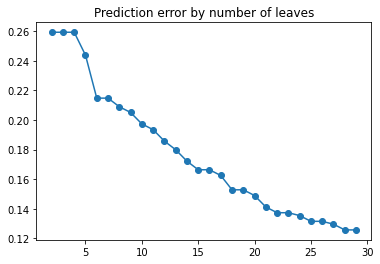

In [34]:
plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr)
plt.title('Prediction error by number of leaves')
plt.show()

Next we'll plot the training error with the test error for each of the models.

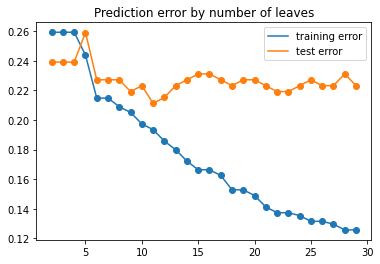

In [35]:
plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr, label='training error')
plt.scatter(nleaves, testerr)
plt.plot(nleaves, testerr, label='test error')
plt.legend()
plt.title('Prediction error by number of leaves')
plt.show()

Now we will see how the performance of the model is affected by the size of the training data.  We will:
- create an additional mask `minimask` and use it to create a new set of training data
- train a decision tree classifier with 5 leaf nodes
- calculate the error rate on the train and test set of the model given the size of the training data

In [0]:
testerr = []
minierr = []
ms = [math.ceil(len(traindat) * (i+1)/10) for i in range(10)]
# actualms = []
repeats = 20

for m in ms:
  minitotal = 0
  testtotal = 0
  for r in range(repeats):
    minimask = [random.randint(0,len(traindat)-1) <= m for i in range(len(traindat))]
    minidat = [traindat[i] for i in range(len(traindat)) if minimask[i]]
    minilabs = [trainlabs[i] for i in range(len(traindat)) if minimask[i]]
    clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)	
    clf = clf.fit(minidat, minilabs)
    pred = clf.predict(minidat)
    minitotal += sum([pred[i] != minilabs[i] for i in range(len(minilabs))]) / len(minilabs)
    pred = clf.predict(testdat)
    testtotal += sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)
  minierr += [minitotal / repeats]
  testerr += [testtotal / repeats]

We plot the accuracy on the training set in relation to the size of the training data below.

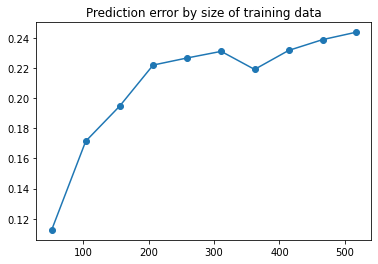

In [37]:
plt.scatter(ms, minierr)
plt.plot(ms, minierr)
plt.title('Prediction error by size of training data')
plt.show()

Finally, we plot the error rate of the training data and the test data in relation to the size of the training data.

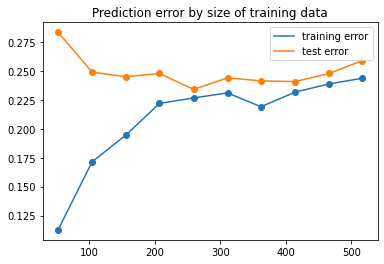

In [38]:
plt.scatter(ms, minierr)
plt.plot(ms, minierr, label = 'training error')
plt.scatter(ms, testerr)
plt.plot(ms, testerr, label = 'test error')
plt.legend()
plt.title('Prediction error by size of training data')
plt.show()